In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	2
float64		column 3	1
float64		column 4	2
int64		column 5	0
float64		column 6	1
float64		column 7	1
float64		column 8	2
float64		column 9	1
float64		column 10	2
float64		column 11	1
float64		column 12	0
float64		column 13	1


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,177.000000,176.000000,177.000000,176.000000,178.000000,177.000000,177.000000,176.000000,177.000000,176.000000,177.000000,178.000000,177.000000
mean,12.996610,2.324148,2.367345,19.528409,99.741573,2.290000,2.022768,0.362386,1.596271,5.056023,0.958339,2.611685,749.276836
std,0.812362,1.101247,0.274899,3.282576,14.282484,0.623888,0.997908,0.124648,0.569464,2.306495,0.228911,0.709990,314.186444
min,11.030000,0.740000,1.360000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.360000,1.597500,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.240000,0.780000,1.937500,502.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.560000,4.690000,0.970000,2.780000,675.000000
75%,13.670000,3.047500,2.560000,21.500000,107.000000,2.800000,2.860000,0.442500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

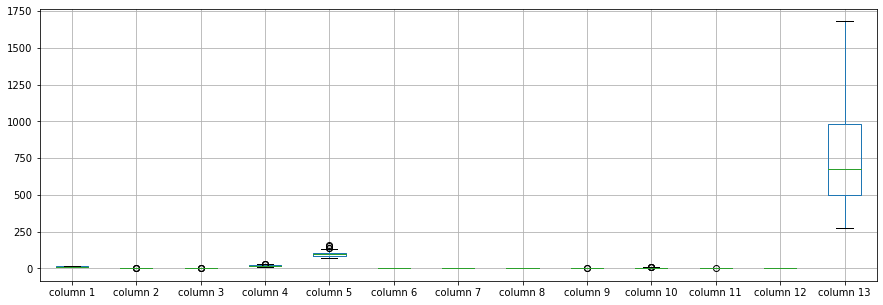

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.996610
column 2       2.324148
column 3       2.367345
column 4      19.528409
column 5      99.741573
column 6       2.290000
column 7       2.022768
column 8       0.362386
column 9       1.596271
column 10      5.056023
column 11      0.958339
column 12      2.611685
column 13    749.276836
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.100797,0.210101,-0.323796,0.270955,0.278461,0.233559,-0.166267,0.134594,0.546155,-0.083743,0.063465,0.641523
column 2,0.100797,1.000000,0.170454,0.272682,-0.042551,-0.324238,-0.393402,0.262770,-0.222654,0.230062,-0.552307,-0.351996,-0.194762
column 3,0.210101,0.170454,1.000000,0.416164,0.284870,0.132694,0.134599,0.190797,0.008861,0.247839,-0.071670,0.006877,0.216631
column 4,-0.323796,0.272682,0.416164,1.000000,-0.101231,-0.329116,-0.379168,0.359147,-0.238548,0.000136,-0.276461,-0.304214,-0.457377
column 5,0.270955,-0.042551,0.284870,-0.101231,1.000000,0.206080,0.207901,-0.258944,0.229768,0.200206,0.054457,0.066004,0.389831
column 6,0.278461,-0.324238,0.132694,-0.329116,0.206080,1.000000,0.863039,-0.449231,0.605461,-0.053659,0.442565,0.697936,0.501935
column 7,0.233559,-0.393402,0.134599,-0.379168,0.207901,0.863039,1.000000,-0.536517,0.644879,-0.168772,0.546303,0.786352,0.506645
column 8,-0.166267,0.262770,0.190797,0.359147,-0.258944,-0.449231,-0.536517,1.000000,-0.354100,0.127623,-0.269250,-0.501285,-0.325715
column 9,0.134594,-0.222654,0.008861,-0.238548,0.229768,0.605461,0.644879,-0.354100,1.000000,-0.002855,0.286278,0.512823,0.322382
column 10,0.546155,0.230062,0.247839,0.000136,0.200206,-0.053659,-0.168772,0.127623,-0.002855,1.000000,-0.522788,-0.426117,0.308302


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+65,13+65+65,13+65+65,13+65+65+65+65,13+65+65+65+65+65,13+65+65+65+65+65+65,13+65+65+65+65+65,13+65+65+65+65,13+65+65+65,13+65+65,13+65,13], vae_layer = False, seed = 650)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 957.300087668679
Epoch: 1 , loss: 956.5530450994319
Epoch: 2 , loss: 959.6038318980824
Epoch: 3 , loss: 960.8725474964489
Epoch: 4 , loss: 954.5808216441761
Epoch: 5 , loss: 957.8234308416194
Epoch: 6 , loss: 959.7914928089489
Epoch: 7 , loss: 960.6763416637074
Epoch: 8 , loss: 956.6691339666194
Epoch: 9 , loss: 952.3711492365056
Epoch: 10 , loss: 958.3263161399148
Epoch: 11 , loss: 952.4099953391335
Epoch: 12 , loss: 960.299394087358
Epoch: 13 , loss: 958.614052512429
Epoch: 14 , loss: 954.0648415305398
Epoch: 15 , loss: 959.0717995383523
Epoch: 16 , loss: 958.9069324840199
Epoch: 17 , loss: 956.7240988991477
Epoch: 18 , loss: 955.8887218128551
Epoch: 19 , loss: 955.5747958096591
Epoch: 20 , loss: 957.4192393909801
Epoch: 21 , loss: 955.7021706321023
Epoch: 22 , loss: 956.3680419921875
Epoch: 23 , loss: 961.3312766335227
Epoch: 24 , loss: 961.3073453036221
Epoch: 25 , loss: 957.6980590820312
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(27.39790005295613, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.0025140121013819813

In [18]:
new_df.iloc[66,:]

column 1      13.110000
column 2       1.010000
column 3       1.700000
column 4      15.000000
column 5      78.000000
column 6       2.980000
column 7       0.234429
column 8       0.260000
column 9       2.280000
column 10      5.300000
column 11      1.120000
column 12      3.180000
column 13    502.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [22]:
imputations[-1].to_excel("Wine_NG_1(imp).xlsx", index=False, header=False)